## 210968002 Sagar Kumar
## Week 4
## Exercise 1 – Data Preprocessing, Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
df = pd.read_excel("Cereals1.xls")
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


### Q1) Create a table with the 5-number summary of all the numeric attributes. 

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.723684,6.934211,93.657895,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,4.160444,4.473136,68.502565,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


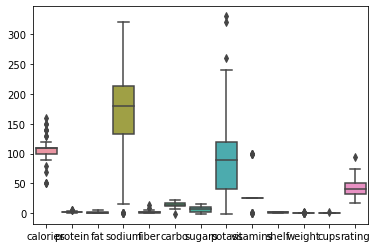

In [3]:
sns.boxplot(data=df)
df.describe()

### Q2) For each of the numeric attributes (proteins up to vitamins), identify and replace all missing data (indicated with -1) with the arithmetic mean of the attribute.

In [4]:
not_null_df = df.mask(df == -1).fillna(df.mean(numeric_only=True, skipna=True))
not_null_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,93.657895,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.000000,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.000000,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.000000,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.000000,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.000000,25,1,1.0,1.00,51.592193


### Q3) Create a table with the 5-number summary of all the numeric attributes after treating missing values. Do you think the strategy used in dealing with missing values was effective? 

In [34]:
print("It was effective to some extent")
not_null_df.describe()

It was effective to some extent


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.930575,7.038608,96.148892,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,3.737575,4.377048,66.688658,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,43.750000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.861842,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


### Q4) For each of the numeric attributes (proteins up to vitamins), identify and replace all noisy data with the median of attribute.

In [6]:
# 1.5 * IQR
q1 = not_null_df.quantile(0.25, numeric_only=True)
q3 = not_null_df.quantile(0.75, numeric_only=True)
iqr = (q3 - q1) * 1.5

denoised_df = not_null_df.iloc[:, 3:].mask(df.iloc[:, 3:] < (q1 - iqr)).mask(df.iloc[:, 3:] > (q3 + iqr)).fillna(df.median(numeric_only=True, skipna=True))
denoised_df

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,120.0,3.0,5,15.0,2.00,8.0,8.0,135.000000,25.0,3,1.0,1.00,33.983679
1,110.0,4.0,1,260.0,1.75,7.0,5.0,90.000000,25.0,3,1.0,0.33,59.425505
2,110.0,4.0,0,140.0,1.75,8.0,0.0,90.000000,25.0,3,1.0,0.50,40.253086
3,110.0,2.0,2,200.0,1.00,14.0,8.0,93.657895,25.0,3,1.0,0.75,34.384843
4,110.0,2.0,2,180.0,1.50,10.5,10.0,70.000000,25.0,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,110.0,2.0,1,250.0,0.00,21.0,3.0,60.000000,25.0,3,1.0,0.75,39.106174
72,110.0,1.0,1,140.0,0.00,13.0,12.0,25.000000,25.0,2,1.0,1.00,27.753301
73,100.0,3.0,1,230.0,3.00,17.0,3.0,115.000000,25.0,1,1.0,0.67,49.787445
74,100.0,3.0,1,200.0,3.00,17.0,3.0,110.000000,25.0,1,1.0,1.00,51.592193


### Q5) Create a table with the 5-number summary of all the numeric attributes after treating noisy values. Do you think the strategy used in dealing with noisy values was effective?

In [35]:
print("Denoising was more effective and shows the distribution of values better")
denoised_df.describe()

Denoising was more effective and shows the distribution of values better


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0,76.000000,76.0,76.000000,76.000000
mean,107.236842,2.401316,1.013158,181.381579,1.792105,14.927632,7.038608,85.754155,25.0,2.197368,1.0,0.817632,41.623743
std,8.099166,0.875670,1.013159,60.186370,1.520220,3.737828,4.377048,48.049515,0.0,0.832982,0.0,0.213478,12.464724
min,90.000000,1.000000,0.000000,15.000000,0.000000,7.000000,0.000000,15.000000,25.0,1.000000,1.0,0.250000,18.042851
25%,100.000000,2.000000,0.000000,147.500000,0.750000,12.000000,3.000000,43.750000,25.0,1.000000,1.0,0.670000,32.932466
50%,110.000000,2.250000,1.000000,180.000000,1.625000,14.750000,7.000000,90.000000,25.0,2.000000,1.0,0.750000,40.179526
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,110.000000,25.0,3.000000,1.0,1.000000,50.031833
max,120.000000,4.000000,5.000000,320.000000,6.000000,23.000000,15.000000,230.000000,25.0,3.000000,1.0,1.330000,74.472949


### Q6)  Cross tabulate the type of cereal (hot vs cold) against the manufacturer

In [8]:
pd.crosstab(df["mfr"], df["type"])

type,C,H
mfr,,
A,0,1
G,22,0
K,23,0
N,4,1
P,9,0
Q,7,1
R,8,0


### Q7) Which is the cereal with the best rating, worst rating?

In [17]:
print(f"The cereal with best rating is: {df.loc[df['rating'].idxmax(), 'name']}")
print(f"The cereal with worst rating is: {df.loc[df['rating'].idxmin(), 'name']}")

The cereal with best rating is: All-Bran_with_Extra_Fiber
The cereal with worst rating is: Cap'n'Crunch


### Q8) Plot a side-by-side boxplot comparing the consumer rating of hot vs. cold cereals.

Text(0.5, 1.0, 'Boxplot of consumer rating vs type')

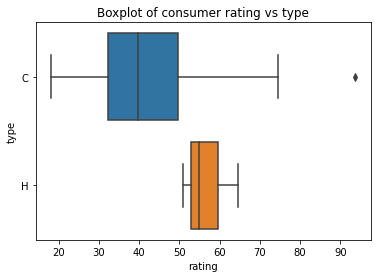

In [24]:
sns.boxplot(data=df, x="rating", y="type")
plt.title("Boxplot of consumer rating vs type")

### Q9) Is there a relation between sugars, calories, carbs, and fat?

In [36]:
print("There is a relation between sugars, calories, carbs and fats")
print("Sugars - calories and fat - calories have a strong positive correlation")

df[["sugars", "calories", "carbo", "fat"]].corr()

There is a relation between sugars, calories, carbs and fats
Sugars - calories and fat - calories have a strong positive correlation


,sugars,calories,carbo,fat
sugars,1.000000,0.571072,-0.349902,0.270861
calories,0.571072,1.000000,0.205913,0.510630
carbo,-0.349902,0.205913,1.000000,-0.329676
fat,0.270861,0.510630,-0.329676,1.000000


### Q10) Which manufacturers produce cereal with highest calories?

In [11]:
df.loc[df["calories"].idxmax(), "mfr"]

'K'

### Q11) Use correlation tests and visualization to identify if the two variables calories and consumer rating associated?

F_onewayResult(statistic=576.8786819375374, pvalue=2.88283004391097e-53)

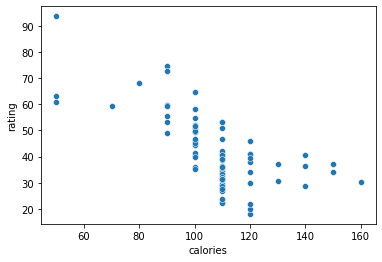

In [38]:
sns.scatterplot(data=df, x="calories", y="rating")
st.f_oneway(df["calories"], df["rating"])

### Q12)  Use correlation tests and visualization to identify if the two variables shelf and consumer rating associated?  

(0.0,
 1.0,
 0,
 array([3., 3., 3., 3., 1., 2., 3., 1., 3., 2., 1., 2., 3., 2., 1., 1., 2.,
        2., 3., 2., 3., 3., 3., 2., 1., 2., 3., 3., 2., 1., 2., 3., 3., 3.,
        2., 1., 1., 3., 3., 2., 2., 2., 2., 3., 3., 3., 1., 2., 3., 3., 3.,
        3., 3., 3., 3., 3., 1., 2., 3., 3., 1., 1., 1., 1., 1., 2., 1., 2.,
        3., 3., 3., 3., 2., 1., 1., 1.]))

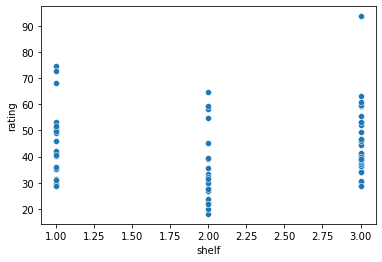

In [41]:
sns.scatterplot(data=df, x="shelf", y="rating")
st.chi2_contingency(df["shelf"], df["rating"])

### Q13)  Is there a relation between manufacturer and rating?

<AxesSubplot:xlabel='mfr', ylabel='rating'>

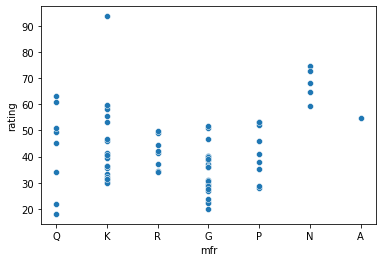

In [32]:
sns.scatterplot(data=df, x="mfr", y="rating")

### Q14) Which nutrients are essential for a good rating for a cereal?

In [40]:
print("From the table, we see that fiber, protein and potassium have strong positive correlation with rating and hence are essential for a good rating")
df[["protein","fat","sodium","fiber","carbo","sugars","potass","rating"]].corr()

From the table, we see that fiber, protein and potassium have strong positive correlation with rating and hence are essential for a good rating


,protein,fat,sodium,fiber,carbo,sugars,potass,rating
protein,1.000000,0.211159,-0.049025,0.483619,-0.095487,-0.329460,0.533987,0.453683
fat,0.211159,1.000000,-0.005473,0.018689,-0.329676,0.270861,0.202936,-0.418439
sodium,-0.049025,-0.005473,1.000000,-0.059662,0.357897,0.100585,-0.021418,-0.402077
fiber,0.483619,0.018689,-0.059662,1.000000,-0.288379,-0.142865,0.894895,0.557242
carbo,-0.095487,-0.329676,0.357897,-0.288379,1.000000,-0.349902,-0.295586,0.113173
sugars,-0.329460,0.270861,0.100585,-0.142865,-0.349902,1.000000,0.030211,-0.772303
potass,0.533987,0.202936,-0.021418,0.894895,-0.295586,0.030211,1.000000,0.339925
rating,0.453683,-0.418439,-0.402077,0.557242,0.113173,-0.772303,0.339925,1.000000


### Q15)  Design a Linear regression model to predict the rating of a cereal based on top 3 related nutrients. Tabulate the accuracy of the model using an 80, 20 split.